# RetainNet

In [43]:
import tensorflow as tf
import keras_cv
from keras.utils import get_file, load_img, img_to_array

# Download image
url = (
    "https://upload.wikimedia.org/wikipedia/commons/thumb/7/7d/"
    "A_Sunday_on_La_Grande_Jatte%2C_Georges_Seurat%2C_1884.jpg/"
    "1280px-A_Sunday_on_La_Grande_Jatte%2C_Georges_Seurat%2C_1884.jpg"
)
path = get_file(origin=url)

In [44]:
target_height = 640
target_width = 1280
image = load_img(path, target_size=(target_height, target_width))
image = img_to_array(image) / 255.0
image = tf.expand_dims(image, axis=0)

In [45]:
detector = keras_cv.models.RetinaNet.from_preset(
    "retinanet_resnet50_pascalvoc",
    bounding_box_format="rel_xywh"
)

In [46]:
predictions = detector.predict(image)

/Users/yuhaochen/Developer/LearnDeepLearning/ObjectDetection/.pixi/envs/default/lib/python3.9/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: {'images': 'images'}
Received: inputs=Tensor(shape=(1, 640, 1280, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 52s 52s/step


In [47]:
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
from matplotlib.patches import Rectangle


color_map = {0: "gray"}

def label_to_color(label):
    if label not in color_map:  
        h, s, v = (len(color_map) * 0.618) % 1, 0.5, 0.9  
        color_map[label] = hsv_to_rgb((h, s, v))  
    return color_map[label]

def draw_box(ax, box, text, color):
    x, y, w, h = box
    ax.add_patch(Rectangle((x, y), w, h, lw=2, ec=color, fc="none"))
    textbox = dict(fc=color, pad=1, ec="none")
    ax.text(x, y, text, c="white", size=10, va="bottom", bbox=textbox)

def draw_image(ax, image):
    ax.set(xlim=(0, 1), ylim=(1, 0), xticks=[], yticks=[], aspect="equal")  
    image = plt.imread(image)
    height, width = image.shape[:2]
    hpad = (1 - height / width) / 2 if width > height else 0  
    wpad = (1 - width / height) / 2 if height > width else 0  
    extent = [wpad, 1 - wpad, 1 - hpad, hpad]  
    ax.imshow(image, extent=extent)
    
def coco_id_to_name(id):
    return id

In [48]:
[(k, v.shape) for k, v in predictions.items()]

[('boxes', (1, 100, 4)),
 ('confidence', (1, 100)),
 ('classes', (1, 100)),
 ('num_detections', (1,))]

In [49]:
predictions["boxes"][0][0]

array([-0.00078125, -0.0015625 , -0.00078125, -0.0015625 ], dtype=float32)

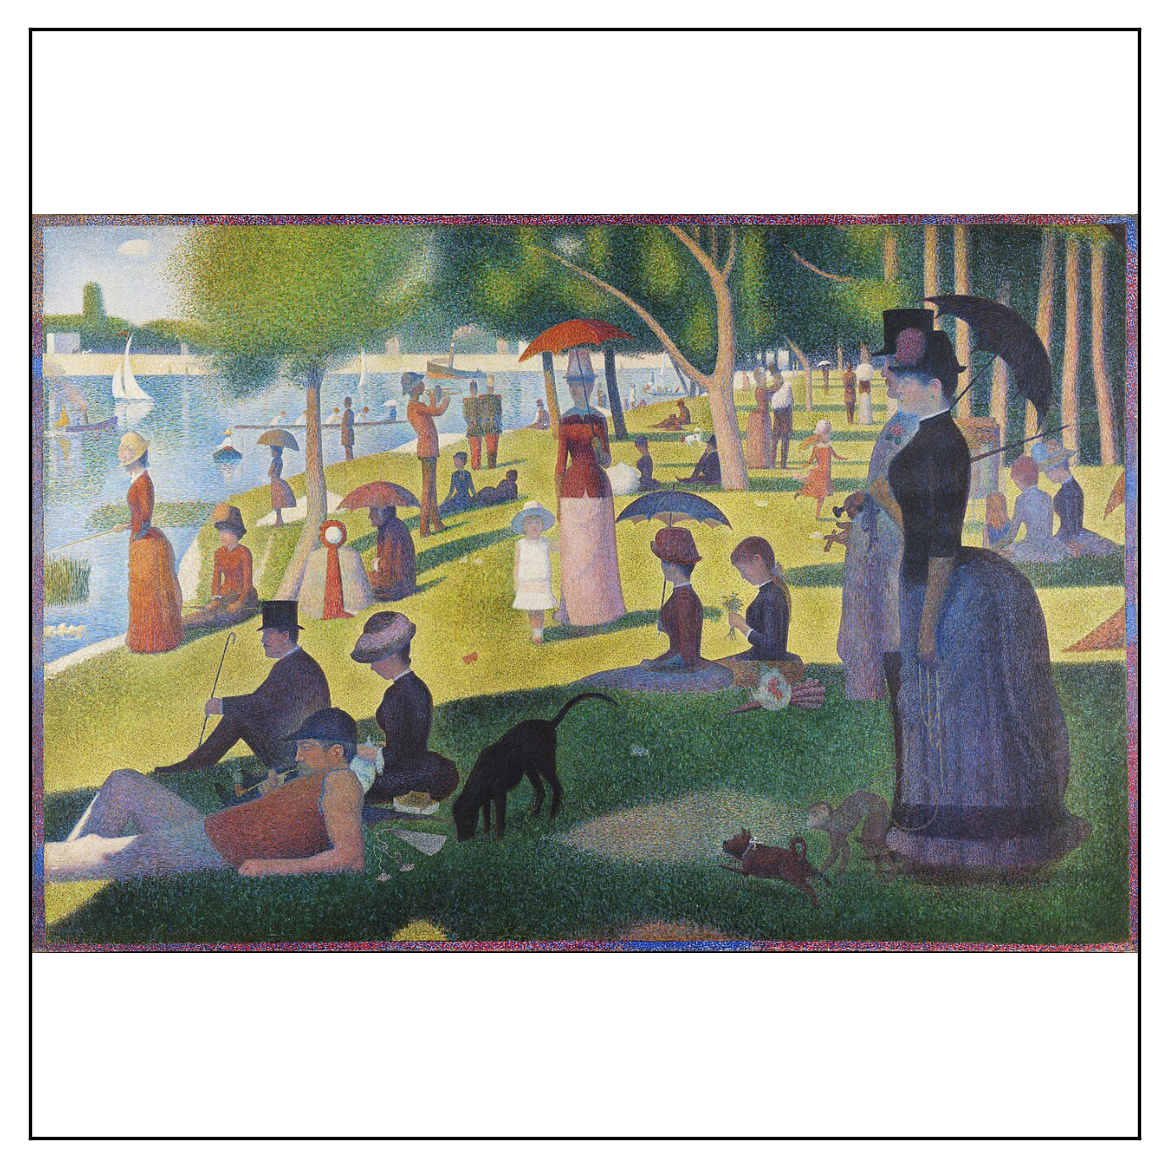

In [50]:
fig, ax = plt.subplots(dpi=300)
draw_image(ax, path)
num_detections = predictions["num_detections"][0]
for i in range(num_detections):
    box = predictions["boxes"][0][i]
    label = predictions["labels"][0][i]
    label_name = coco_id_to_name(label)
    draw_box(ax, box, label_name, label_to_color(label))
plt.show()